# **Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import time
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import recall_score

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/BT4012/Code submission/data_39.csv", encoding= "UTF-8")
df.head(1)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,...,company_profile_length,requirements_length,benefits_length,description_length,country,state,city,min_salary,max_salary,salary_specified
0,marketing intern,Marketing,food52 create groundbreaking award win cooking...,food52 fast grow james beard award win online ...,experience content management system major plu...,NaN,0,1,0,Other,...,90,77,0,84,US,NY,New York,0,0,0


In [11]:
# filling null values, 'Not Applicable' and 'Unspecified' with 'Not Specified'
df.fillna('Not Specified', inplace=True)
df = df.replace(['Not Applicable','Unspecified'],'Not Specified')

# **Text Cleaning**

In [12]:
# REMOVING STOPWORDS AND SYMBOLS FROM ATTRIBUTES WITH LENGTHY TEXTS (['company_profile','description','requirements','benefits'])
nltk.download('stopwords')
stop = stopwords.words()
sym = "!@#$%^&*+-={}[]|\"':;<>,.?/`~()_" #SYMBOLS TO BE REMOVED
listsym = ([*sym])
listsym.append("'")
listsym.append('"')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
le = preprocessing.LabelEncoder()
#ASSIGNS NUMBER TO EVERY LABEL
for i in df.columns:
    le.fit(df[i])
    df[i]=le.transform(df[i])

# **Model**

In [17]:
X = df.drop(['fraudulent'], axis=1)
Y = df["fraudulent"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify = Y)

In [19]:
#FUNCTION TO TRAIN THE MODEL, PREDICT THE LABELS FOR TEST SAMPLES AND CALCULATE THE ACCURACY AND PRECISION

def traintest(model, modelname):
    start = time.time()
    #Training the model
    model.fit(X_train, Y_train) 

    #Predicting X_train
    Y_pred_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(Y_train, Y_pred_train)
    precision_train = metrics.precision_score(Y_train, Y_pred_train)
    recall_train = recall_score(Y_train, Y_pred_train)

    #Predicting X_test
    Y_pred_test = model.predict(X_test)
    #Calculating the accuracy
    accuracy_test = metrics.accuracy_score(Y_test, Y_pred_test)
    #Calculating the precision
    precision_test = metrics.precision_score(Y_test, Y_pred_test)
    recall_test = recall_score(Y_test, Y_pred_test)
    #Total Time
    end = time.time() - start
    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end

In [20]:
import warnings
warnings.filterwarnings('ignore')  

stats = pd.DataFrame(columns=["Model", "accuracy_train", "accuracy_test", "precision_train", "precision_test", "recall_train", "recall_test", "end"])

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(GaussianNB(), "NAIVE BAYES")
stats.loc[len(stats.index)] = ["NAIVE BAYES", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(DecisionTreeClassifier(), "DECISION TREE")
stats.loc[len(stats.index)] = ["DECISION TREE", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(RandomForestClassifier(), "RANDOM FOREST")
stats.loc[len(stats.index)] = ["RANDOM FOREST", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(KNeighborsClassifier(), "KNN")
stats.loc[len(stats.index)] = ["KNN", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(SVC(),"SVM")
stats.loc[len(stats.index)] = ["SVM", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end = traintest(LogisticRegression(),"LOGISTIC REGRESSION") # solver='liblinear'
stats.loc[len(stats.index)] = ["LOGISITC REGRESSION", accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, end]

stats

,Model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,end
0,NAIVE BAYES,0.869351,0.870022,0.221436,0.223065,0.673846,0.680556,0.050467
1,DECISION TREE,1.000000,0.970917,1.000000,0.690265,1.000000,0.722222,0.256575
2,RANDOM FOREST,1.000000,0.982550,1.000000,0.966216,1.000000,0.662037,2.502839
3,KNN,0.965026,0.959060,0.790997,0.670103,0.378462,0.300926,7.853223
4,SVM,0.951529,0.951678,0.000000,0.000000,0.000000,0.000000,8.293656
5,LOGISITC REGRESSION,0.951752,0.951678,0.615385,0.000000,0.012308,0.000000,1.431173


## **Model Accuracy**

<BarContainer object of 6 artists>

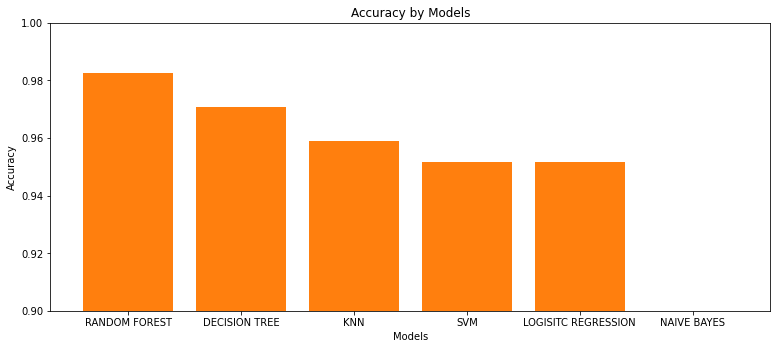

In [21]:
fig = plt.figure(1,figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
stats = stats.sort_values('accuracy_test', ascending = False)
models = stats["Model"]
accuracy = stats["accuracy_test"]
ax.bar(models, accuracy)
ax.set_ylim([0.9, 1])
ax.set_xlabel('Models')
# plt.xticks(rotation='45')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models')
plt.bar(models, height = accuracy)

Random Forest has the highest accuracy among other models. 

## **Model Computation Time**

<BarContainer object of 6 artists>

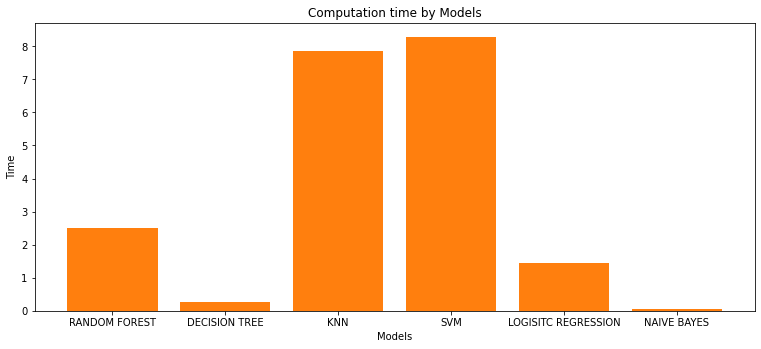

In [22]:
fig = plt.figure(1,figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
models = stats["Model"]
accuracy = stats["end"]
ax.bar(models, accuracy)
ax.set_xlabel('Models')
# plt.xticks(rotation='45')
ax.set_ylabel('Time')
ax.set_title('Computation time by Models')
plt.bar(models, height = accuracy)

Naive Bayes has the fastest computation time but has very low accuracy. 

## **Model Precision**

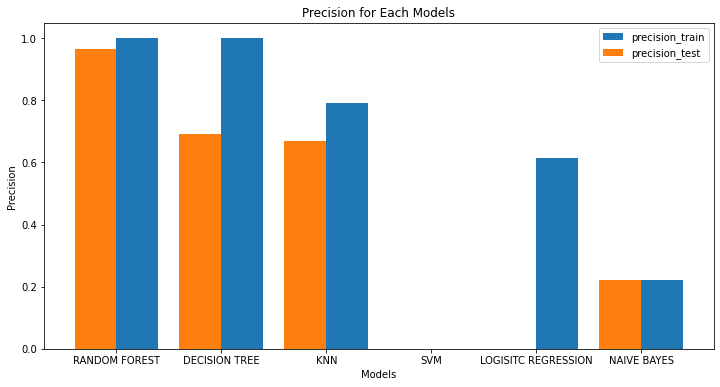

In [23]:
fig = plt.figure(1,figsize=(12, 6))

X_axis =  np.arange(len(stats["Model"]))

plt.bar(X_axis + 0.2, stats["precision_train"], 0.4, label = 'precision_train')
plt.bar(X_axis - 0.2, stats["precision_test"], 0.4, label = 'precision_test')
  
plt.xticks(X_axis, stats["Model"])
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precision for Each Models")
plt.legend()
plt.show()

Random Forest has the highest precision rate for both test and train dataset. 

## **Model Recall Rate**

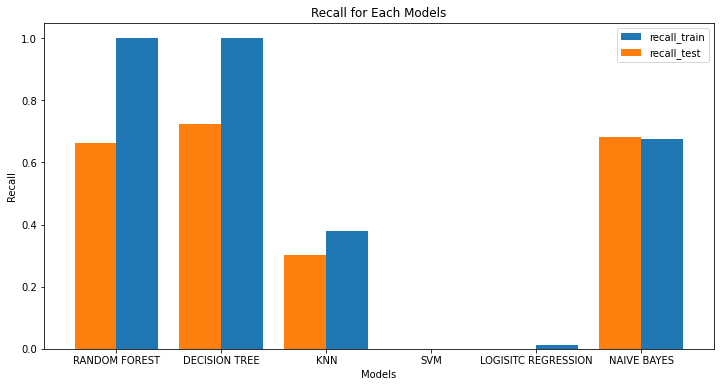

In [24]:
X_axis =  np.arange(len(stats["Model"]))
fig = plt.figure(1,figsize=(12, 6))
plt.bar(X_axis + 0.2, stats["recall_train"], 0.4, label = 'recall_train')
plt.bar(X_axis - 0.2, stats["recall_test"], 0.4, label = 'recall_test')
  
plt.xticks(X_axis, stats["Model"])
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall for Each Models")
plt.legend()
plt.show()

Decision Tree has the highest recall rate on test as compared to other models. 

# **Feature importance**

## **Feature importance by accuracy**

In [25]:
model_rfm = RandomForestClassifier(random_state=42)
model_rfm.fit(X_train, Y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, Y_test)

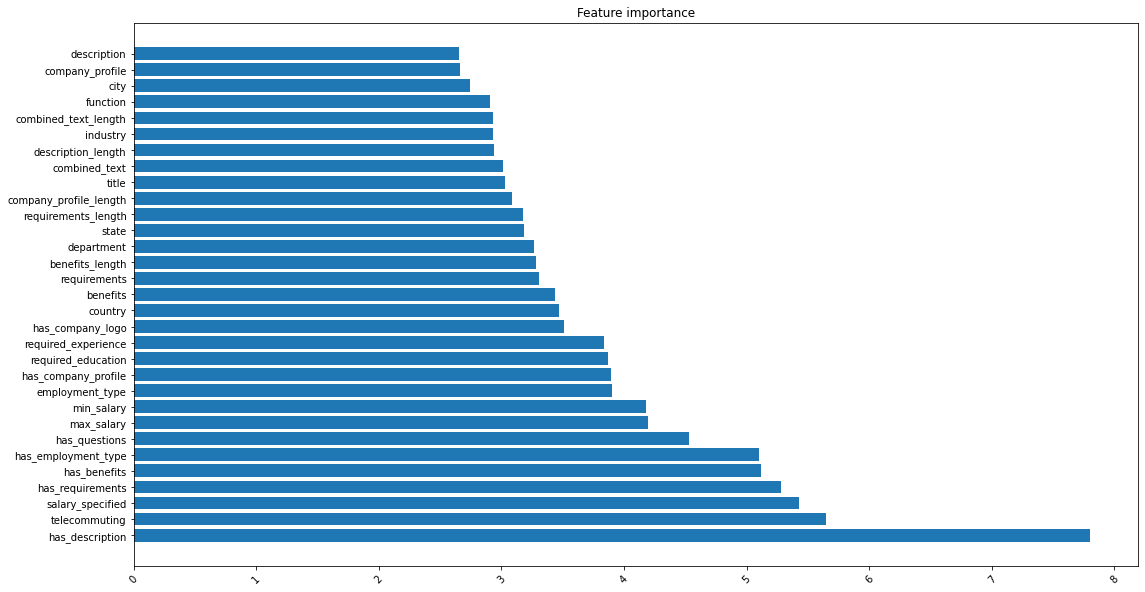

In [26]:
# Chose ML model
feature_dict=dict(zip((X_train.columns),list(model_rfm.feature_importances_)))

log_val = []
for i in feature_dict.values():
    log_val.append(np.log(i))

log_val = np.nan_to_num(log_val, neginf=0)
log_val = [i * (-1) for i in log_val]
names = list(feature_dict.keys())
dictionary = dict(zip(names, log_val))

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse = True))
names = []
values = []

for k, v in sorted_dict.items():
    if v != -0.0:
        names.append(k)
        values.append(v)
        
plt.figure(figsize = (18, 10))
plt.barh(range(len(values)), values, tick_label=names)
plt.xticks(rotation=45)
plt.title('Feature importance')
plt.show()

In terms of accuracy, `has_description` has the most influence on the prediction of job posting. 

## **Feature important by f1 score**

### **xgboost**

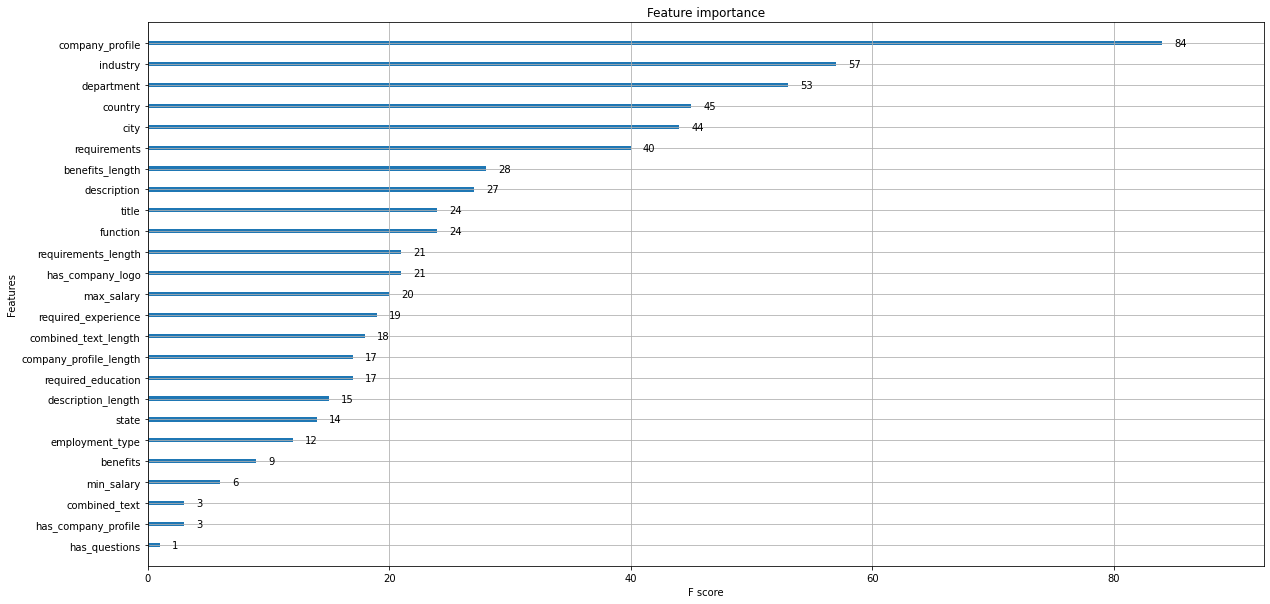

In [27]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

plt.rcParams["figure.figsize"] = (20, 10)
plot_importance(model)
plt.show()

In terms of f1 score, `company_profile` has the most influence on the job posting prediction.